# Applications: Model

## Build regression models with Statsmodels

## Setup

In [1]:
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

import pandas as pd
import seaborn as sns 


sns.set_theme(style="ticks", color_codes=True)

## Data preparation

See notebook `10a-application-model-data-exploration.ipynb` for details about data preprocessing and data exploration. 

In [2]:
ROOT = "https://raw.githubusercontent.com/kirenz/modern-statistics/main/data/"
DATA = "duke-forest.csv"
df = pd.read_csv(ROOT + DATA)

# Drop irrelevant features
df = df.drop(['url', 'address', 'type'], axis=1)

# Convert data types
df['heating'] = df['heating'].astype("category")
df['cooling'] = df['cooling'].astype("category")
df['parking'] = df['parking'].astype("category")

# drop column with too many missing values
df = df.drop(['hoa'], axis=1)
# drop remaining row with missing value
df = df.dropna()

## Data preparation for sklearn

In [4]:
dummies = pd.get_dummies(df[['cooling']])
dummies.info()
print(dummies.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97 entries, 0 to 97
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   cooling_central  97 non-null     uint8
 1   cooling_other    97 non-null     uint8
dtypes: uint8(2)
memory usage: 970.0 bytes
   cooling_central  cooling_other
0                1              0
1                1              0
2                1              0
3                1              0
4                1              0


## Data splitting

In [23]:
train_dataset = df.sample(frac=0.8, random_state=0)
test_dataset = df.drop(train_dataset.index)

## Modeling

In [25]:
# Fit Model
lm = smf.ols(formula='price ~ area', data=train_dataset).fit()

In [26]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.462
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     65.37
Date:                Thu, 26 Aug 2021   Prob (F-statistic):           7.56e-12
Time:                        20:58:13   Log-Likelihood:                -1053.3
No. Observations:                  78   AIC:                             2111.
Df Residuals:                      76   BIC:                             2115.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8.593e+04   6.21e+04      1.383      0.171   -3.78e+04     2.1e+05
area         167.7007     20.741      8.085      0.000     126.391     209.010
==============================================================================
Omnibus:                       26.589   Durbin-Watson:                   2.159
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.927
Skew:                          -0.862   Prob(JB):                     3.66e-24
Kurtosis:                       8.499   Cond. No.                     9.16e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

To obtain single statistics:

In [27]:
# Adjusted R squared 
lm.rsquared_adj

0.4553434818683253

In [28]:
# R squared
lm.rsquared

0.4624169431427626

In [29]:
# AIC
lm.aic

2110.625966301898

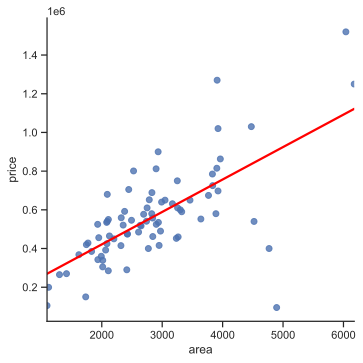

In [31]:
# Plot regression line 
sns.lmplot(x='area', y='price', data=train_dataset, 
         line_kws={'color':'red'}, height=5, ci=None, );

In [30]:
# Add the regression predictions (as "pred") to our DataFrame
train_dataset['pred'] = lm.predict()

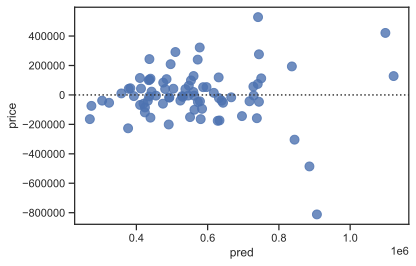

In [32]:
sns.residplot(x="pred", y="price", data=train_dataset, scatter_kws={"s": 80});

## Multiple regression

In [33]:
lm_m = smf.ols(formula='price ~ area + bed + bath + year_built + cooling', data=train_dataset).fit()

In [34]:
lm_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     16.77
Date:                Thu, 26 Aug 2021   Prob (F-statistic):           5.90e-11
Time:                        20:58:13   Log-Likelihood:                -1047.4
No. Observations:                  78   AIC:                             2107.
Df Residuals:                      72   BIC:                             2121.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1.425e+06   2.46e+06     -0.579      0.565   -6.33e+06    3.48e+06
cooling[T.other] -9.052e+04   4.04e+04     -2.239      0.028   -1.71e+05   -9921.539
area               137.1117     27.787      4.934      0.000      81.720     192.503
bed               4056.5058   3.43e+04      0.118      0.906   -6.42e+04    7.23e+04
bath              4.467e+04   3.21e+04      1.390      0.169   -1.94e+04    1.09e+05
year_built         757.3660   1262.412      0.600      0.550   -1759.207    3273.939
==============================================================================
Omnibus:                       25.539   Durbin-Watson:                   2.115
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              110.043
Skew:                          -0.785   Prob(JB):                     1.27e-24
Kurtosis:                       8.603   Cond. No.                     4.51e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.51e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""